In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
close = pd.read_csv('sp500_close.csv',
                    index_col=0, parse_dates=True)


In [7]:
close.head()

,AAL,AAPL,AAP,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,...,XLNX,XL,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
2013-02-08,14.75,67.8542,78.90,36.25,46.89,34.41,73.31,39.12,45.70,30.22,...,37.51,28.24,88.61,42.87,31.84,27.09,65.30,75.85,24.14,33.05
2013-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-11,14.46,68.5614,78.39,35.85,46.76,34.26,73.07,38.64,46.08,30.28,...,37.46,28.31,88.28,42.84,31.96,27.46,64.55,75.65,24.21,33.26
2013-02-12,14.27,66.8428,78.60,35.42,46.96,34.30,73.37,38.89,46.27,30.81,...,37.58,28.41,88.46,42.87,31.84,27.95,64.75,75.44,24.49,33.74


In [4]:
goog = close[['GOOG']].copy().dropna()

In [5]:
goog.head()

,GOOG
2014-03-27,558.46
2014-03-28,559.99
2014-03-31,556.97
2014-04-01,567.16
2014-04-02,567.00


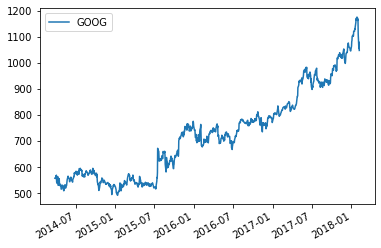

In [6]:
goog.plot();

In [9]:
# Log Return
goog_ret = np.log(goog.pct_change(1) + 1)

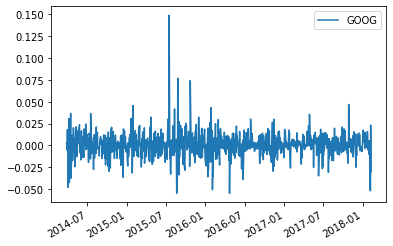

In [10]:
goog_ret.plot();

In [11]:
goog['SMA-10'] = goog['GOOG'].rolling(10).mean()
goog.head(20)

,GOOG,SMA-10
2014-03-27,558.46,NaN
2014-03-28,559.99,NaN
2014-03-31,556.97,NaN
2014-04-01,567.16,NaN
2014-04-02,567.00,NaN
2014-04-03,569.74,NaN
2014-04-04,543.14,NaN
2014-04-07,538.15,NaN
2014-04-08,554.90,NaN
2014-04-09,564.14,557.965


In [13]:
type(goog['GOOG'].rolling(10))

pandas.core.window.rolling.Rolling

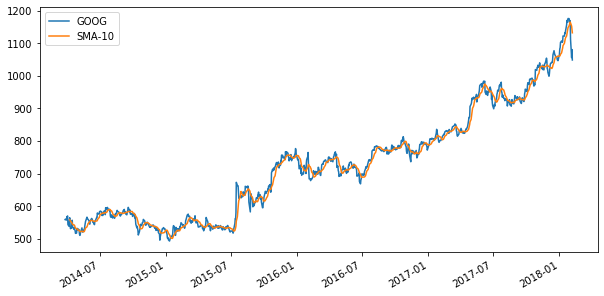

In [14]:
goog.plot(figsize=(10,5))

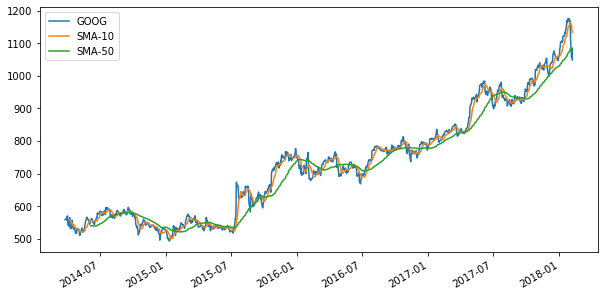

In [15]:
goog['SMA-50'] = goog['GOOG'].rolling(50).mean()
goog.plot(figsize=(10,5))

In [16]:
goog_aapl = close[['GOOGL','AAPL']].copy().dropna()
cov = goog_aapl.rolling(50).cov()
cov

GOOGL       AAPL
2013-02-08 GOOGL          NaN        NaN
           AAPL           NaN        NaN
2013-02-11 GOOGL          NaN        NaN
           AAPL           NaN        NaN
2013-02-12 GOOGL          NaN        NaN
...                       ...        ...
2018-02-05 AAPL     31.600907  17.568865
2018-02-06 GOOGL  2587.454434  35.784632
           AAPL     35.784632  19.121371
2018-02-07 GOOGL  2589.194012  47.980929
           AAPL     47.980929  22.052882

[2518 rows x 2 columns]

In [17]:
cov.loc['2018-02-07'].to_numpy()

array([[2589.19401225,   47.98092857],
       [  47.98092857,   22.05288249]])

In [18]:
goog_aapl_ret = np.log(1 + goog_aapl.pct_change(1))
goog_aapl_ret.head()

,GOOGL,AAPL
2013-02-08,NaN,NaN
2013-02-11,-0.003763,0.010368
2013-02-12,-0.002201,-0.025386
2013-02-13,0.002763,-0.001905
2013-02-14,0.006316,-0.000900


In [20]:
goog_aapl_ret['GOOG-SMA-50'] = goog_aapl_ret['GOOGL'].rolling(50).mean()
goog_aapl_ret['AAPL-SMA-50'] = goog_aapl_ret['AAPL'].rolling(50).mean()

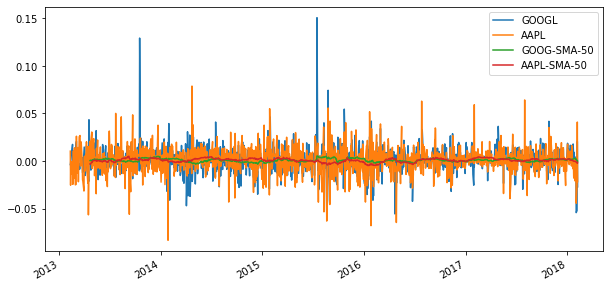

In [22]:
goog_aapl_ret.plot(figsize=(10,5));

In [26]:
cov = goog_aapl_ret[['GOOGL','AAPL']].rolling(50).cov()
cov.tail()

GOOGL      AAPL
2018-02-05 AAPL   0.000111  0.000143
2018-02-06 GOOGL  0.000204  0.000129
           AAPL   0.000129  0.000177
2018-02-07 GOOGL  0.000219  0.000140
           AAPL   0.000140  0.000185

In [27]:
corr = goog_aapl_ret[['GOOGL','AAPL']].rolling(50).corr()
corr.tail(16)

GOOGL      AAPL
2018-01-29 GOOGL  1.000000  0.490633
           AAPL   0.490633  1.000000
2018-01-30 GOOGL  1.000000  0.485252
           AAPL   0.485252  1.000000
2018-01-31 GOOGL  1.000000  0.473149
           AAPL   0.473149  1.000000
2018-02-01 GOOGL  1.000000  0.467405
           AAPL   0.467405  1.000000
2018-02-02 GOOGL  1.000000  0.649415
           AAPL   0.649415  1.000000
2018-02-05 GOOGL  1.000000  0.666557
           AAPL   0.666557  1.000000
2018-02-06 GOOGL  1.000000  0.677383
           AAPL   0.677383  1.000000
2018-02-07 GOOGL  1.000000  0.694199
           AAPL   0.694199  1.000000